In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [8]:
#Import csv in pandas dataframe
data = pd.read_csv("flipkart_product.csv", encoding='latin1')

In [9]:
#print first 5 rows of the data
data.head(5)

,ProductName,Price,Rate,Review,Summary
0,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",5,Super!,Great cooler.. excellent air flow and for this...
1,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",5,Awesome,Best budget 2 fit cooler. Nice cooling
2,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",3,Fair,The quality is good but the power of air is de...
3,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",1,Useless product,Very bad product it's a only a fan
4,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",3,Fair,Ok ok product


In [18]:
# Perform sentiment analysis
sentiments = SentimentIntensityAnalyzer()
data["Positive"] = [sentiments.polarity_scores(review)["pos"] for review in data["Review"]]
data["Negative"] = [sentiments.polarity_scores(review)["neg"] for review in data["Review"]]
data["Neutral"] = [sentiments.polarity_scores(review)["neu"] for review in data["Review"]]

In [19]:
#Clean and prepare the columns contining reviews before heading to sentiment analysis
import nltk
import re

nltk.download("stopwords")
stemmer=nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
import string
stopword=set(stopwords.words("english"))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [14]:
def clean(text):
      text=str(text).lower()
      text=re.sub("\[.*?\]","",text)
      text=re.sub("https?://\S+|www\.\S+","",text)
      text=re.sub("<.*?>+","",text)
      text=re.sub("[%s]"% re.escape(string.punctuation),"",text)
      text=re.sub("\n","",text)
      text=re.sub("\w*\d\w*","",text)
      text=[word for word in text.split(" ") if word not in stopword]
      text=" ".join(text)
      return text

In [15]:
data["Review"] = data["Review"].apply(clean)

In [16]:
data.head(5)

,ProductName,Price,Rate,Review,Summary
0,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",5,super,Great cooler.. excellent air flow and for this...
1,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",5,awesome,Best budget 2 fit cooler. Nice cooling
2,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",3,fair,The quality is good but the power of air is de...
3,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",1,useless product,Very bad product it's a only a fan
4,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",3,fair,Ok ok product


In [33]:
#The Rating column of the data contains the ratings given by every reviewer. So lets have a look at how most of the people rate the products they buy from the Flipcart
rating = data["Rate"].value_counts()
numbers=rating.index
quantity=rating.values

In [34]:
rating

Rate
5                                                             41140
4                                                             15411
1                                                              7452
3                                                              6374
2                                                              2570
Pigeon Favourite Electric Kettle?ÿ?ÿ(1.5 L, Silver, Black)        1
Name: count, dtype: int64

In [35]:
numbers

Index(['5', '4', '1', '3', '2',
       'Pigeon Favourite Electric Kettle?ÿ?ÿ(1.5 L, Silver, Black)'],
      dtype='object', name='Rate')

In [36]:
quantity

array([41140, 15411,  7452,  6374,  2570,     1])

In [37]:
data["Rate"].value_counts()

Rate
5                                                             41140
4                                                             15411
1                                                              7452
3                                                              6374
2                                                              2570
Pigeon Favourite Electric Kettle?ÿ?ÿ(1.5 L, Silver, Black)        1
Name: count, dtype: int64

In [38]:
data["Rate"].value_counts() == 1

Rate
5                                                             False
4                                                             False
1                                                             False
3                                                             False
2                                                             False
Pigeon Favourite Electric Kettle?ÿ?ÿ(1.5 L, Silver, Black)     True
Name: count, dtype: bool

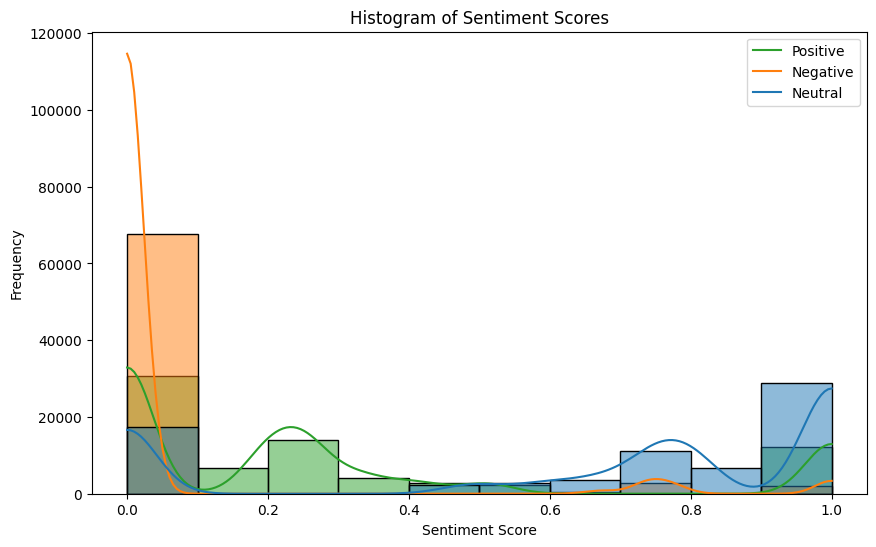

In [20]:
# Plotting sentiment analysis results
# Histogram of Positive, Negative, and Neutral sentiments
plt.figure(figsize=(10, 6))
sns.histplot(data[['Positive', 'Negative', 'Neutral']], bins=10, kde=True, color=['green', 'red', 'gray'])
plt.title('Histogram of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.legend(['Positive', 'Negative', 'Neutral'])
plt.show()


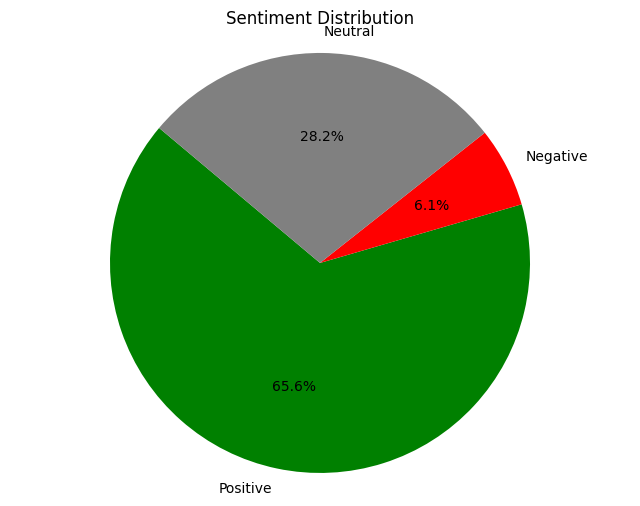

In [21]:
# Pie chart of sentiment distribution
sentiment_counts = [sum(data["Positive"]), sum(data["Negative"]), sum(data["Neutral"])]
sentiment_labels = ['Positive', 'Negative', 'Neutral']
plt.figure(figsize=(8, 6))
plt.pie(sentiment_counts, labels=sentiment_labels, autopct='%1.1f%%', startangle=140, colors=['green', 'red', 'gray'])
plt.title('Sentiment Distribution')
plt.axis('equal')
plt.show()

<ipython-input-22-ee28d2149b3b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_labels, y=sentiment_counts, palette=['green', 'red', 'gray'])


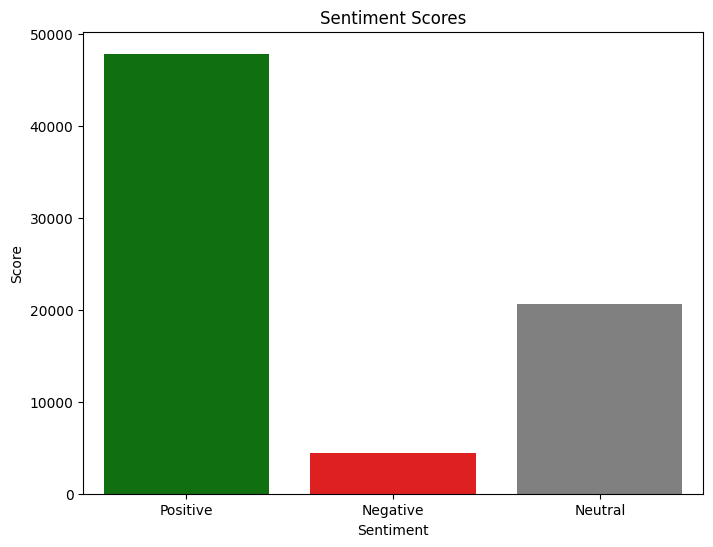

In [22]:
# Bar plot of sentiment scores
plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_labels, y=sentiment_counts, palette=['green', 'red', 'gray'])
plt.title('Sentiment Scores')
plt.xlabel('Sentiment')
plt.ylabel('Score')
plt.show()

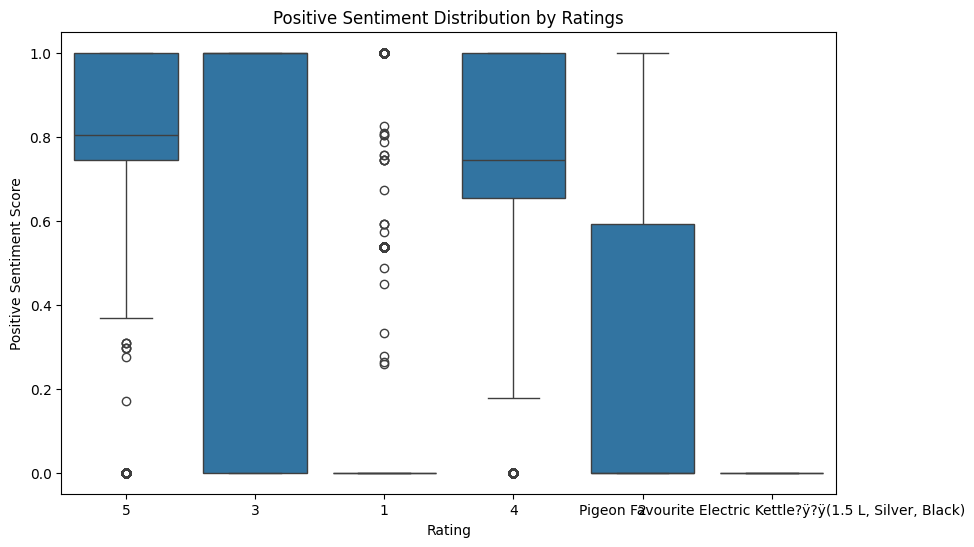

In [23]:
# Analyze sentiment distribution by ratings
plt.figure(figsize=(10, 6))
sns.boxplot(x='Rate', y='Positive', data=data)
plt.title('Positive Sentiment Distribution by Ratings')
plt.xlabel('Rating')
plt.ylabel('Positive Sentiment Score')
plt.show()

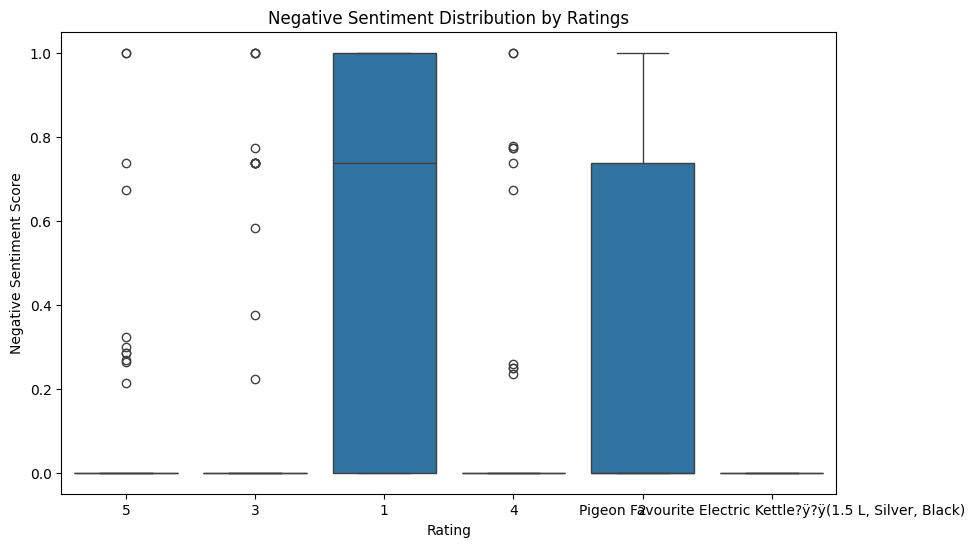

In [24]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Rate', y='Negative', data=data)
plt.title('Negative Sentiment Distribution by Ratings')
plt.xlabel('Rating')
plt.ylabel('Negative Sentiment Score')
plt.show()

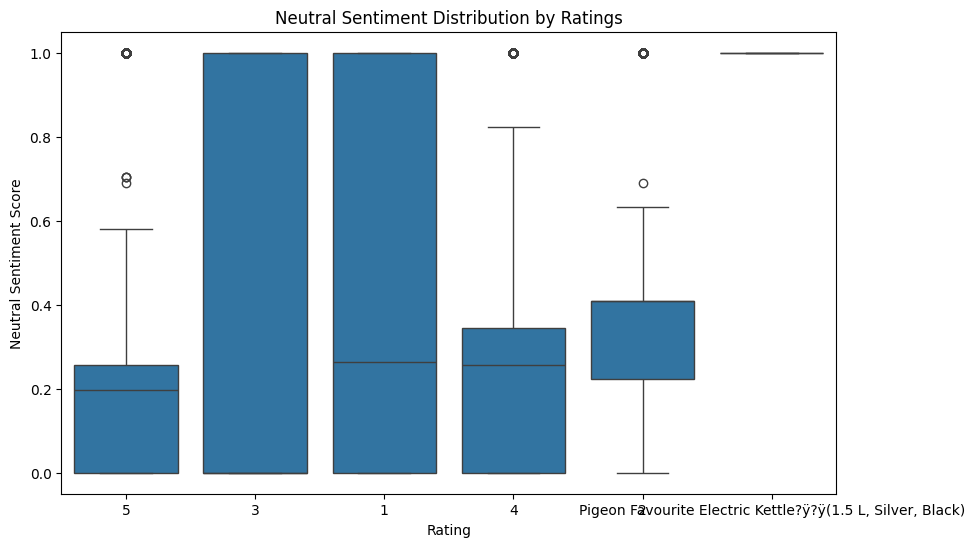

In [25]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Rate', y='Neutral', data=data)
plt.title('Neutral Sentiment Distribution by Ratings')
plt.xlabel('Rating')
plt.ylabel('Neutral Sentiment Score')
plt.show()

In [32]:
import plotly.express as px
figure = px.pie(data,
               values=quantity,
               names=numbers,hole=0.5)

figure.show()

In [40]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

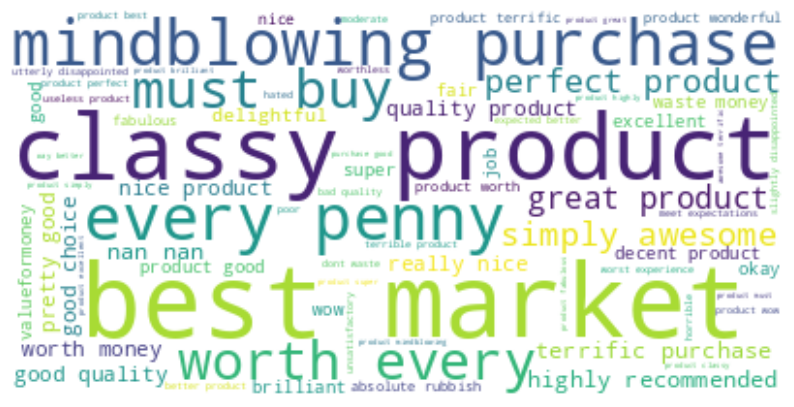

In [42]:
#use a word cloud to visualize the most used words in the reviews column:
text = " ".join(i for i in data.Review)
stopwords = set(STOPWORDS)

wordcloud = WordCloud(stopwords=stopwords,
                     background_color="white").generate(text)

plt.figure(figsize=(10,15))
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show()

In [44]:
#Analyze the sentimates of Flipcart reviews by adding three columns in dataset as Positive,Negative and Neutral-
#by clustring the sentiment score of the review
nltk.download("vader_lexicon")
sentiments=SentimentIntensityAnalyzer()
data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["Review"]]
data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data["Review"]]
data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data["Review"]]

data = data[["Review","Positive","Negative","Neutral"]]

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [45]:
data.head(5)

,Review,Positive,Negative,Neutral
0,super,1.0,0.000,0.000
1,awesome,1.0,0.000,0.000
2,fair,1.0,0.000,0.000
3,useless product,0.0,0.737,0.263
4,fair,1.0,0.000,0.000


In [47]:
#Now let's see how most of the reviewers think about the product Service of flipcart
x=sum(data["Positive"])
y=sum(data["Negative"])
z=sum(data["Neutral"])

def sentiment_score(a,b,c):
    if (a>b) and (a>c):
            print("Positive 😀")
    elif (b>a) and (b>c):
            print("Negative 😡")
    elif (c>a) and (c>b):
            print("Neutral 😐")

In [48]:
sentiment_score(x,y,z)

Positive 😀


In [49]:
#So most most of the reviews are Positive, let's have a look at the total of Positive, Negative and Neutral sentiment score-
#to find a conclusion about Flipcart reviews
print("Positive",x)
print("Negative",y)
print("Neutral",z)

Positive 47865.31599999343
Negative 4478.411000000013
Neutral 20603.27599999827
